In [46]:
import os
import cv2
import numpy as np

def create_mask(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get a list of image filenames in the input folder
    image_files = [f for f in os.listdir(input_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

    for image_file in image_files:
        # Read the image
        image_path = os.path.join(input_folder, image_file)
        image = cv2.imread(image_path)

        if image is None:
            print(f"Error: Unable to open image file {image_path}")
            continue

        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        # Define the range of orange color in HSV
        lower_orange = np.array([4, 150, 150])   # Lower bound for orange in HSV
        upper_orange = np.array([16, 255, 255])  # Upper bound for orange in HSV

        # Create a mask where the orange pixels are white and all other pixels are black
        mask = cv2.inRange(hsv_image, lower_orange, upper_orange)

        # Save the mask
        mask_filename = os.path.join(output_folder, f"mask_{image_file}")
        cv2.imwrite(mask_filename, mask)

    print("Masks created and saved.")

if __name__ == "__main__":
    # Input folder containing annotated images
    input_folder = "img_annotated"
    
    # Output folder for masks
    output_folder = "img_mask"

    # Create masks
    create_mask(input_folder, output_folder)


Masks created and saved.


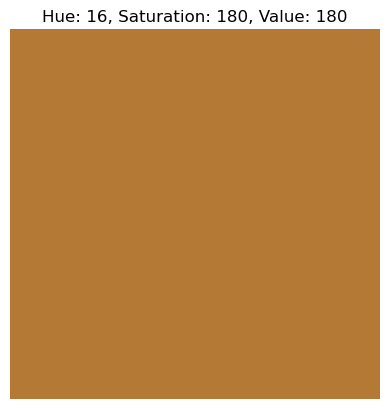

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_hsv_color(hue, saturation, value):
    # Create a 10x10 image filled with the chosen HSV color
    color_hsv = np.uint8([[[hue, saturation, value]]])
    color_rgb = cv2.cvtColor(color_hsv, cv2.COLOR_HSV2RGB)
    color_image = np.tile(color_rgb, (10, 10, 1))

    # Display the image using matplotlib
    plt.imshow(color_image)
    plt.title(f"Hue: {hue}, Saturation: {saturation}, Value: {value}")
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    # Example: plot a color with hue=60, saturation=255, value=255 (which corresponds to yellow)
    plot_hsv_color(16, 180, 180)
